In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install nltk

In [ ]:
import pandas as pd

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
news_df = pd.read_parquet("/content/drive/MyDrive/2.cryptonews_processed.parquet")
news_df['content'] = news_df['title'] + '. ' + news_df['text']
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the 'content' column
news_df['tokenized_content'] = news_df['content'].apply(preprocess_text)

# Display the first few rows
print(news_df[['title', 'content']].head())


                                               title  \
0  2021 Bitcoin Price Predictions: Is The Massive...   
1           Will Central Banks Hold Bitcoin in 2021?   
2  Bitcoin Is Digital Social Justice, feat. Tyron...   
3  Bitcoin hits all-time high against gold as hav...   
4  The Last Time This Indicator Flashed, Bitcoin ...   

                                             content  
0  2021 Bitcoin Price Predictions: Is The Massive...  
1  Will Central Banks Hold Bitcoin in 2021?. Cent...  
2  Bitcoin Is Digital Social Justice, feat. Tyron...  
3  Bitcoin hits all-time high against gold as hav...  
4  The Last Time This Indicator Flashed, Bitcoin ...  


In [ ]:
# # Assuming your dataframe is named 'df'
# all_tokens = ' '.join(news_df['tokenized_content']).split()

# # Count the frequency of each word
# word_counts = Counter(all_tokens)

# # Get the top 30 most common words
# top_50_words = word_counts.most_common(300)

# # Convert to DataFrame for better readability
# top_50_df = pd.DataFrame(top_50_words, columns=['Word', 'Frequency'])

# print(top_50_df)


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import numpy as np
# from gensim.models import KeyedVectors
# from gensim.test.utils import lee_corpus_list
# from gensim.models import Word2Vec

# # Load pre-trained word embeddings (e.g., GloVe or Word2Vec)
# # Example: Using GloVe embeddings

# model = Word2Vec(lee_corpus_list, vector_size=24, epochs=100)
# word_vectors = model.wv
# word_vectors.save('vectors.kv')

# word_vectors = KeyedVectors.load("vectors.kv")
# # List of your 150 words
# words = top_50_df["Word"]

# # Get word embeddings for your words
# vectors = np.array([word_vectors[word] for word in words if word in word_vectors])

# print(vectors)
# # Step 3: Perform Clustering (e.g., KMeans)
# n_clusters = 6  # Choose the number of topics
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(vectors)

# # Assign each word to a cluster
# word_clusters = {i: [] for i in range(n_clusters)}
# for word, label in zip(words, kmeans.labels_):
#     word_clusters[label].append(word)

# # Print out the clusters
# for cluster, words in word_clusters.items():
#     print(f"Topic {cluster}: {words}")


In [ ]:
# from gensim.models import KeyedVectors
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # Load pre-trained word embeddings (e.g., GloVe or Word2Vec)
# word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)
# # List of your top 150 words and topics
# top_words = top_50_df["Word"]
# topics = ['Economy', 'Technology', 'Regulation', 'Market Analysis',"Adoption", "Cybersecurity"]

# # Find related words
# related_words = {}
# for topic in topics:
#     related_words[topic] = []
#     if topic in word_vectors:
#         topic_vector = word_vectors[topic]
#         for word in top_words:
#             if word in word_vectors:
#                 word_vector = word_vectors[word]
#                 similarity = cosine_similarity([topic_vector], [word_vector])[0][0]
#                 if similarity > 0.1:  # Adjust threshold as needed
#                     related_words[topic].append((word, similarity))

# # Print related words for each topic
# for topic, words in related_words.items():
#     print(f"Topic: {topic}")
#     print(f"Related Words: {sorted(words, key=lambda x: -x[1])}")


In [ ]:
# from gensim.models import KeyedVectors
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # Load pre-trained word embeddings (e.g., GloVe or Word2Vec)
# word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)
# # List of your top 150 words and topics
# top_words = top_50_df["Word"]
# topics = ['Economy', 'Technology', 'Regulation', 'Market Analysis',"Adoption", "Cybersecurity"]

# # Find related words
# related_words = {}
# for topic in topics:
#     related_words[topic] = []
#     if topic in word_vectors:
#         topic_vector = word_vectors[topic]
#         for word in top_words:
#             if word in word_vectors:
#                 word_vector = word_vectors[word]
#                 similarity = cosine_similarity([topic_vector], [word_vector])[0][0]
#                 if similarity > 0.1:  # Adjust threshold as needed
#                     related_words[topic].append((word, similarity))

# # Print related words for each topic
# for topic, words in related_words.items():
#     print(f"Topic: {topic}")
#     print(f"Related Words: {sorted(words, key=lambda x: -x[1])}")


In [ ]:
topics_keywords = {
    'Economy':[ 'surge', 'rise', 'decline',  'dollar', 'inflation', 'finance', 'country',  'fear',  'china',  'economic', 'rising', 'growing', 'invest',  'optimism', 'rebound', 'treasury', 'plunge', 'collapse']
    ,
    'Technology': ['crypto', 'eth', 'news', 'network', 'security', 'platform', 'technical', 'grayscale', 'announced', 'twitter', 'founder', 'energy', 'tesla', 'development', 'cofounder', 'milestone', 'lightning',  'gbtc', 'flagship', 'technology']
    ,
    'Regulation':['sec', 'fed','approval', 'xrp', 'commission', 'federal', 'shortterm', 'regulatory', 'doge', 'bill', 'ftx', 'government']
    ,
    'Market Analysis': ['price', 'market','analyst', 'asset',  'investor' 'spot', 'trading', 'mining', 'exchange', 'trader', 'bull', 'surge', 'hit', 'potential', 'financial', 'volatility', 'decline']
    ,
    'Adoption':['microstrategy', 'adoption', 'fee', 'ark', 'dad', 'filing']    ,
    'Cybersecurity': ['cryptocurrency', 'bitcoins', 'ethereum', 'alltime', 'halving', 'blockchain', 'coinbase', 'saylor', 'hodl', 'btcs', 'solana', 'tldr']
    }


In [ ]:
for topic,keywords in topics_keywords.items():
    print(f"Topic: {topic}")
    print(f"Keywords: {keywords}")

Topic: Economy
Keywords: ['surge', 'rise', 'decline', 'dollar', 'inflation', 'finance', 'country', 'fear', 'china', 'economic', 'rising', 'growing', 'invest', 'optimism', 'rebound', 'treasury', 'plunge', 'collapse']
Topic: Technology
Keywords: ['crypto', 'eth', 'news', 'network', 'security', 'platform', 'technical', 'grayscale', 'announced', 'twitter', 'founder', 'energy', 'tesla', 'development', 'cofounder', 'milestone', 'lightning', 'gbtc', 'flagship', 'technology']
Topic: Regulation
Keywords: ['sec', 'fed', 'approval', 'xrp', 'commission', 'federal', 'shortterm', 'regulatory', 'doge', 'bill', 'ftx', 'government']
Topic: Market Analysis
Keywords: ['price', 'market', 'analyst', 'asset', 'investorspot', 'trading', 'mining', 'exchange', 'trader', 'bull', 'surge', 'hit', 'potential', 'financial', 'volatility', 'decline']
Topic: Adoption
Keywords: ['microstrategy', 'adoption', 'fee', 'ark', 'dad', 'filing']
Topic: Cybersecurity
Keywords: ['cryptocurrency', 'bitcoins', 'ethereum', 'alltime

In [ ]:
def assign_topic(text, percentage=0.3):
    topic_scores = {}
    for topic, keywords in topics_keywords.items():
        score = 0
        for keyword in keywords:
            pattern = r'\b' + re.escape(keyword.lower()) + r'\b'
            matches = re.findall(pattern, text.lower())
            score += len(matches)
        topic_scores[topic] = score
    max_score = max(topic_scores.values())
    assigned_topics = [topic for topic, score in topic_scores.items() if score >= percentage * max_score and score > 0]
    if not assigned_topics:
        assigned_topics = ['Other']
    return assigned_topics


In [ ]:

news_df['topic'] = news_df['tokenized_content'].apply(assign_topic)
print(news_df.head())


                                               title  \
0  2021 Bitcoin Price Predictions: Is The Massive...   
1           Will Central Banks Hold Bitcoin in 2021?   
2  Bitcoin Is Digital Social Justice, feat. Tyron...   
3  Bitcoin hits all-time high against gold as hav...   
4  The Last Time This Indicator Flashed, Bitcoin ...   

                                                text    source_name  \
0  As the bitcoin price hovers under the psycholo...         Forbes   
1  Central banks (CB) will hold bitcoin sooner or...     BeInCrypto   
2  The podcaster and CEO of Onramp Invest discuss...       Coindesk   
3  BTC has hit another milestone, this time again...  Cointelegraph   
4  Bitcoin has been facing some turbulence as of ...     Bitcoinist   

                       date  \
0 2021-01-02 00:20:00+00:00   
1 2021-01-01 20:31:35+00:00   
2 2021-01-01 19:15:02+00:00   
3 2021-01-01 18:52:00+00:00   
4 2021-01-01 18:00:00+00:00   

                                             cont

In [ ]:
news_df.to_parquet("KeywordBasedABSA.parquet")

# Sentiment Analysis

In [ ]:
news_df = pd.read_parquet("/content/KeywordBasedABSA.parquet")
news_df.head()

,title,text,source_name,date,content,tokenized_content,topic
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,"[Economy, Market Analysis]"
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Market Analysis]
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,"[Economy, Technology, Market Analysis]"
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Market Analysis]
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis]


In [ ]:
pip install transformers sentencepiece datasets fsspec==2024.10.0


INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s e

In [ ]:
pip install datasets fsspec==2024.10.0

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn import functional as F
from datasets import Dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")
model = model.to(device)
def batch_sentiment(batch):
    # Tokenize the texts with truncation and padding
    inputs = tokenizer(
        batch['content'],
        truncation=True,       # Truncate sequences longer than max_length
        padding=True,          # Pad sequences to the longest in the batch
        max_length=512,        # Set the maximum sequence length to 512
        return_tensors='pt'
    )

    # Move tensors to the appropriate device (CPU or GPU)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model outputs without calculating gradients (for efficiency)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get logits from the outputs
    logits = outputs.logits

    # Apply softmax to get probabilities (optional)
    probabilities = torch.softmax(logits, dim=-1)

    # Get the predicted class indices
    predictions = torch.argmax(logits, dim=-1)

    # Map predictions to sentiment labels
    # Assuming the model uses the following label mapping:
    # 0 -> 'Negative', 1 -> 'Neutral', 2 -> 'Positive'
    label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiments = [label_mapping[int(prediction)] for prediction in predictions]

    # Alternatively, you can include probabilities with the sentiments
    # sentiments = [{'label': label_mapping[int(prediction)], 'score': float(probabilities[i][prediction])} for i, prediction in enumerate(predictions)]

    # Return sentiments as a list
    return {'sentiment': sentiments}

df = pd.read_parquet("/content/KeywordBasedABSA.parquet")
dataset = Dataset.from_pandas(df)
results = dataset.map(batch_sentiment, batched=True, batch_size=8)

# Convert the results back to a DataFrame
df_results = results.to_pandas()

df_results.to_parquet("finbert_keyword_based.parquet")
df_results.head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/155376 [00:00<?, ? examples/s]

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,"[Economy, Market Analysis]",0,Positive
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Market Analysis],1,Positive
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,"[Economy, Technology, Market Analysis]",2,Positive
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Market Analysis],3,Negative
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,Neutral


In [ ]:
news_df = df_results
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
news_df['sentiment'] = news_df['sentiment'].map(sentiment_mapping)
news_df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,"[Economy, Market Analysis]",0,1
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Market Analysis],1,1
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,"[Economy, Technology, Market Analysis]",2,1
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Market Analysis],3,-1
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0


In [ ]:
news_df.to_parquet('/content/drive/MyDrive/scored_keyword_based_news.parquet.gzip',compression='gzip')

In [ ]:
news_df = pd.read_parquet("/content/drive/MyDrive/scored_keyword_based_news.parquet.gzip")
topic_df = pd.read_parquet("/content/drive/MyDrive/tokenizednews_topic.parquet.gzip")
topics_col = topic_df["topic"]
news_df["topic"] =  topic_df["topic"]
news_df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis],0,1
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy],1,1
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other],2,1
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other],3,-1
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0


In [ ]:
topic_columns = ['Economy', 'Market Analysis', 'Technology', 'Adoption',
                 'Cybersecurity', 'Others', 'Regulation']
news = news_df
df_exploded = news.explode('topic')

# Use one-hot encoding to create binary columns for each unique topic
df_one_hot = pd.get_dummies(df_exploded['topic'], prefix='', prefix_sep='')

# Group back to the original structure by summing up binary columns
df_final = df_one_hot.groupby(df_exploded.index).sum()

# Combine the binary columns with the original DataFrame
df = pd.concat([news, df_final], axis=1)
df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis],0,1,0,0,0,1,0,0,0
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy],1,1,0,0,1,0,0,0,0
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other],2,1,0,0,0,0,1,0,0
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other],3,-1,0,0,0,0,1,0,0
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0,0,0,0,1,0,0,0


In [ ]:
df.head()

,title,text,source_name,date,content,tokenized_content,topic,__index_level_0__,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021 Bitcoin Price Predictions: Is The Massive...,As the bitcoin price hovers under the psycholo...,Forbes,2021-01-02 00:20:00+00:00,2021 Bitcoin Price Predictions: Is The Massive...,bitcoin price prediction massive bitcoin bull ...,[Market Analysis],0,1,0,0,0,1,0,0,0
1,Will Central Banks Hold Bitcoin in 2021?,Central banks (CB) will hold bitcoin sooner or...,BeInCrypto,2021-01-01 20:31:35+00:00,Will Central Banks Hold Bitcoin in 2021?. Cent...,central bank hold bitcoin central bank cb hold...,[Economy],1,1,0,0,1,0,0,0,0
2,"Bitcoin Is Digital Social Justice, feat. Tyron...",The podcaster and CEO of Onramp Invest discuss...,Coindesk,2021-01-01 19:15:02+00:00,"Bitcoin Is Digital Social Justice, feat. Tyron...",bitcoin digital social justice feat tyrone ros...,[Other],2,1,0,0,0,0,1,0,0
3,Bitcoin hits all-time high against gold as hav...,"BTC has hit another milestone, this time again...",Cointelegraph,2021-01-01 18:52:00+00:00,Bitcoin hits all-time high against gold as hav...,bitcoin hit alltime high gold battle rage btc ...,[Other],3,-1,0,0,0,0,1,0,0
4,"The Last Time This Indicator Flashed, Bitcoin ...",Bitcoin has been facing some turbulence as of ...,Bitcoinist,2021-01-01 18:00:00+00:00,"The Last Time This Indicator Flashed, Bitcoin ...",last time indicator flashed bitcoin dropped ba...,[Market Analysis],4,0,0,0,0,1,0,0,0


In [ ]:
processed_news = df.drop(["__index_level_0__", "content", "text", "title", "source_name","topic"], axis=1)

processed_news.head()

,date,tokenized_content,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021-01-02 00:20:00+00:00,bitcoin price prediction massive bitcoin bull ...,1,0,0,0,1,0,0,0
1,2021-01-01 20:31:35+00:00,central bank hold bitcoin central bank cb hold...,1,0,0,1,0,0,0,0
2,2021-01-01 19:15:02+00:00,bitcoin digital social justice feat tyrone ros...,1,0,0,0,0,1,0,0
3,2021-01-01 18:52:00+00:00,bitcoin hit alltime high gold battle rage btc ...,-1,0,0,0,0,1,0,0
4,2021-01-01 18:00:00+00:00,last time indicator flashed bitcoin dropped ba...,0,0,0,0,1,0,0,0


In [ ]:
weights = {
    'Adoption': 0.08,
    'Cybersecurity': 0.10,
    'Economy': 0.25,
    'Market Analysis': 0.30,
    'Other': 0.02,
    'Regulation': 0.10,
    'Technology': 0.15
}
processed_news['weighted_sentiment'] = (
    df['Adoption'] * weights['Adoption'] +
    df['Cybersecurity'] * weights['Cybersecurity'] +
    df['Economy'] * weights['Economy'] +
    df['Market Analysis'] * weights['Market Analysis'] +
    df['Other'] * weights['Other'] +
    df['Regulation'] * weights['Regulation'] +
    df['Technology'] * weights['Technology']
)

processed_news.head()

,date,tokenized_content,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology,weighted_sentiment
0,2021-01-02 00:20:00+00:00,bitcoin price prediction massive bitcoin bull ...,1,0,0,0,1,0,0,0,0.30
1,2021-01-01 20:31:35+00:00,central bank hold bitcoin central bank cb hold...,1,0,0,1,0,0,0,0,0.25
2,2021-01-01 19:15:02+00:00,bitcoin digital social justice feat tyrone ros...,1,0,0,0,0,1,0,0,0.02
3,2021-01-01 18:52:00+00:00,bitcoin hit alltime high gold battle rage btc ...,-1,0,0,0,0,1,0,0,0.02
4,2021-01-01 18:00:00+00:00,last time indicator flashed bitcoin dropped ba...,0,0,0,0,1,0,0,0,0.30


In [ ]:
last = processed_news
last['date'] = pd.to_datetime(last['date'])

# Group by date and sum up all other columns

df_grouped = df.groupby(last['date'].dt.date).sum(numeric_only=True).reset_index()

# Rename the 'date' column for clarity
df_grouped.rename(columns={'date': 'grouped_date'}, inplace=True)
df_grouped.head()


,grouped_date,__index_level_0__,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Other,Regulation,Technology
0,2021-01-01,638,-9,1,1,1,19,9,1,0
1,2021-01-02,2541,-20,0,0,1,34,7,0,1
2,2021-01-03,3840,-7,2,0,3,31,7,1,0
3,2021-01-04,10311,-8,2,0,1,50,12,1,1
4,2021-01-05,14550,3,2,0,5,48,10,3,1


In [ ]:
df_grouped.drop(["__index_level_0__","Other"],axis=1)

,grouped_date,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Regulation,Technology
0,2021-01-01,-9,1,1,1,19,1,0
1,2021-01-02,-20,0,0,1,34,0,1
2,2021-01-03,-7,2,0,3,31,1,0
3,2021-01-04,-8,2,0,1,50,1,1
4,2021-01-05,3,2,0,5,48,3,1
...,...,...,...,...,...,...,...,...
1457,2024-12-28,8,6,1,5,46,7,6
1458,2024-12-29,-7,4,2,5,36,8,5
1459,2024-12-30,-24,12,4,16,117,23,11
1460,2024-12-31,-15,5,1,8,93,7,15


In [ ]:
df_grouped.to_parquet("keybased_grouped.parquet")

# Backtest

In [ ]:
pip install pyarrow pandas_ta seaborn matplotlib scikit-learn==1.3.1 yfinance


In [ ]:
import pandas as pd
import pandas_ta as ta
import numpy as np
from numpy import NaN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings

import os
import yfinance as yf
warnings.filterwarnings("ignore")

In [ ]:
def MutualInfo(df):
  X = df.drop(["signal","grouped_date"], axis=1)
  y = df["signal"]
  mi_scores = mutual_info_regression(X, y)
  mi_scores = pd.Series(mi_scores, index=X.columns)
  mi_scores.sort_values(ascending=False, inplace=True)
  print(mi_scores)

In [ ]:
def run_backtest(df):

  # ------------------ Data check ------------------
  # Check for NA values
  if df.isnull().values.any():
    raise ValueError("DataFrame contains NA values")

  # Check for required column: 'signal'
  if 'signal' not in df.columns:
    raise ValueError("DataFrame is missing required column: 'signal'")

  # if 'return_forward_1d' is not present, it will be fetched automatically
  if 'return_forward_1d' not in df.columns:
    df = concat_return(df)

  # ------------------ Average Return & Sharpe ------------------
  # Calculate daily returns
  df['strategy_return'] = df['signal'] * df['return_forward_1d']

  # Overall Geometric Annual Return and Sharpe Ratio
  num_days = len(df)
  annual_return = (1 + df['strategy_return']).prod()**(365/num_days) - 1

  daily_std = df['strategy_return'].std()
  annual_std = daily_std * np.sqrt(365)
  overall_sharpe = annual_return / annual_std

  print(f"Overall Annual Return: {round(annual_return*100, 2)}%")
  print("Overall Annual Sharpe Ratio:", round(overall_sharpe, 4))

  # ------------------ Maximum Drawdown ------------------
  df['cum_return'] = (1 + df['strategy_return']).cumprod()
  rolling_max = df['cum_return'].cummax()
  df['drawdown'] = (df['cum_return'] - rolling_max) / rolling_max
  max_drawdown = df['drawdown'].min()
  print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

  # ------------------ Win/Loss Ratio ------------------
  # Count the number of winning vs losing days
  winning_trades = (df['strategy_return'] > 0).sum()
  losing_trades = (df['strategy_return'] < 0).sum()
  if losing_trades > 0:
    win_loss_ratio = winning_trades / losing_trades
  else:
    win_loss_ratio = np.nan # no losing trades (advoid division by zero)
  print("Win/Loss Ratio:", round(win_loss_ratio, 2))

  # ------------------ Alpha and Beta ------------------
  # Beta = Cov(strategy_return, return_forward_1d) / Var(return_forward_1d)
  cov_matrix = np.cov(df['strategy_return'], df['return_forward_1d'])
  beta = cov_matrix[0, 1] / cov_matrix[1, 1]

  # Alpha = mean(strategy_return) - Beta * mean(return_forward_1d)
  alpha_daily = df['strategy_return'].mean() - beta * df['return_forward_1d'].mean()

  # Annualize alpha
  alpha_annualized = (1 + alpha_daily) ** 365 - 1

  print("Alpha:", round(alpha_annualized, 4))
  print("Beta:", round(beta, 4))

  # ------------------- Yearly Metrics -------------------
  df['year'] = df.index.year

  yearly_data = df.groupby('year').apply(lambda subdf: pd.Series({
    'yearly_return': (1 + subdf['strategy_return']).prod()**(365/len(subdf)) - 1,
    'yearly_std': subdf['strategy_return'].std() * np.sqrt(365),
    'yearly_beta': np.cov(subdf['strategy_return'], subdf['return_forward_1d'])[0,1] /
                    np.cov(subdf['strategy_return'], subdf['return_forward_1d'])[1,1],
    'yearly_alpha': (
      subdf['strategy_return'].mean()
      - (
        np.cov(subdf['strategy_return'], subdf['return_forward_1d'])[0,1]
        / np.cov(subdf['strategy_return'], subdf['return_forward_1d'])[1,1]
      )
      * subdf['return_forward_1d'].mean()
    ) * 365
  })).reset_index()

  yearly_data['yearly_sharpe'] = yearly_data['yearly_return'] / yearly_data['yearly_std']
  print("\nYearly Metrics:")
  print(yearly_data)

  # ------------------------- Plots ----------------------
  df['cum_return_plot'] = (1 + df['strategy_return']).cumprod() - 1
  df['bh_cum_return_plot'] = (1 + df['return_forward_1d']).cumprod() - 1

  # cumulative return plot
  plt.figure(figsize=(8,4))
  plt.plot(df.index, df['cum_return_plot'], label='Strategy Return')
  plt.plot(df.index, df['bh_cum_return_plot'], label='Buy and Hold')
  plt.title('Strategy Cumulative Return')
  plt.xlabel('Date')
  plt.ylabel('Cumulative Return')
  plt.legend()
  plt.show()

  # Signal weight plot
  plt.figure(figsize=(8,4))
  plt.plot(df.index, df['signal'], label='Signal')
  plt.title('Signal Weight Over Time')
  plt.xlabel('Date')
  plt.ylabel('Weight')
  plt.legend()
  plt.show()

def fetch_bitcoin_return_daily():
  price_df = yf.download("BTC-USD", interval="1d", start='2021-01-01', end='2025-01-02')
  price_df = price_df.xs('Close', level='Price', axis=1)
  price_df.columns = ['price']
  price_df['daily_return'] = price_df['price'].pct_change()
  price_df['return_forward_1d'] = price_df['daily_return'].shift(-1)
  price_df.drop(columns=['price', 'daily_return'], inplace=True)
  price_df = price_df[:-1]
  price_df.to_parquet('btc_return_daily.parquet')

def concat_return(df):
  file_path = "btc_return_daily.parquet"
  if os.path.exists(file_path):
    df_btc_return = pd.read_parquet(file_path)
  else:
    fetch_bitcoin_return_daily()
    df_btc_return = pd.read_parquet(file_path)
  merged_df = pd.merge(df, df_btc_return, left_index=True, right_index=True, how='inner')
  return merged_df

def generate_signals(predicted_returns, threshold=0):
    signals = np.where(predicted_returns*100 > threshold, 1, -1)  # 1 for buy, -1 for sell
    return signals

def gen_target(data,btc_price):
  data["target"] = btc_price["Close"].pct_change().shift(-1)
  data["target"] = data["target"].fillna(value=0)
  return data


In [ ]:
data = pd.read_parquet("/content/keybased_grouped.parquet")

In [ ]:

data = data [:-1]
data = data.drop(["__index_level_0__","Other"],axis=1)
data['signal'] = data['sentiment'].apply(lambda x: generate_signals(x))
data['grouped_date'] = pd.to_datetime(data['grouped_date'])

data = data.rename(columns={'grouped_date': 'date'})  # Rename the column
data = data.set_index('date')  # Set the renamed column as the index
data

,sentiment,Adoption,Cybersecurity,Economy,Market Analysis,Regulation,Technology,signal
date,,,,,,,,
2021-01-01,-9,1,1,1,19,1,0,-1
2021-01-02,-20,0,0,1,34,0,1,-1
2021-01-03,-7,2,0,3,31,1,0,-1
2021-01-04,-8,2,0,1,50,1,1,-1
2021-01-05,3,2,0,5,48,3,1,1
...,...,...,...,...,...,...,...,...
2024-12-27,19,7,5,9,103,14,12,1
2024-12-28,8,6,1,5,46,7,6,1
2024-12-29,-7,4,2,5,36,8,5,-1


In [ ]:
nan_counts_before = data.isna().sum()
print(nan_counts_before)

sentiment          0
Adoption           0
Cybersecurity      0
Economy            0
Market Analysis    0
Regulation         0
Technology         0
signal             0
dtype: int64


[*********************100%***********************]  1 of 1 completed


Overall Annual Return: -37.91%
Overall Annual Sharpe Ratio: -0.6124
Maximum Drawdown: -92.43 %
Win/Loss Ratio: 0.99
Alpha: -0.3692
Beta: 0.3665

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       0.636867    0.804511     0.726416      0.229586       0.791620
1  2022      -0.629459    0.634852     0.770687     -0.132739      -0.991505
2  2023      -0.436961    0.442563    -0.197250     -0.264111      -0.987342
3  2024      -0.564443    0.534745    -0.635759     -0.114117      -1.055537


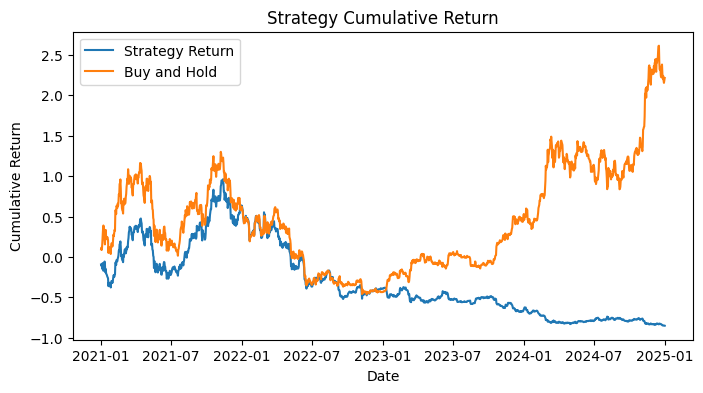

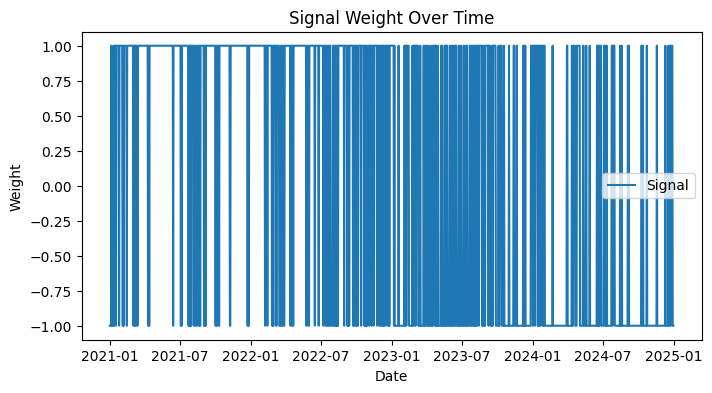

In [ ]:
data.to_parquet("keybased_final.parquet")
run_backtest(data)

In [ ]:
btc_price.head()

,return_forward_1d
Date,
2021-01-01,0.013190
2021-01-02,0.093713
2021-01-03,0.021212
2021-01-04,-0.025416
2021-01-05,0.063689


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

x = pd.DataFrame()
x['signal'] = btc_price["return_forward_1d"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Assuming df1 and df2 are your two dataframes with a 'signal' column
# Ensure both dataframes are aligned (e.g., same index and sorted by date)
assert x.shape[0] == data.shape[0], "Dataframes must have the same number of rows"

# Extract the signal columns from both dataframes
true_signals = x['signal']  # Ground truth signals
predicted_signals = data['signal']  # Predicted signals

# Calculate precision, recall, and F1 score
precision = precision_score(true_signals, predicted_signals, average='binary', pos_label=1)
recall = recall_score(true_signals, predicted_signals, average='binary', pos_label=1)
f1 = f1_score(true_signals, predicted_signals, average='binary', pos_label=1)

# Display the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.45
Recall: 0.50
F1 Score: 0.47
